# Introduction - 
```
There are two primary work of Supervised Learning:
    a. Regression - Idetifying values 
    b. Classification - Identifying class 
```

MNIST data will be used in this program which contains images of digits from 0-9. This is most commonly used dataset for classification problem. 

# Get Dataset
``` 
The API of fetch_openml changed between versions. In earlier versions, it returned a numpy.ndarray array. 
Since 0.24.0 (December 2020), as_frame argument of fetch_openml is set to auto (instead of False as default option earlier) which gives you a pandas.DataFrame for the MNIST data. 
You can force the data read as a numpy.ndarray by setting as_frame = False. See fetch_openml reference .
```

In [1]:
from sklearn.datasets import fetch_openml

# get the mnist dataset for and forcibly get data as ndarray
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [7]:
# check the first data it should be 28x28 = 784 size matrix (ndarray)
len(mnist['data'][0])

784

In [9]:
# check first 10 data
mnist['data'][:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
mnist['target'][:10]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4'], dtype=object)

In [13]:
mnist['categories']

{'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']}

In [15]:
mnist['feature_names']

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

In [16]:
mnist['target_names']

['class']

In [17]:
mnist['details']

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'description_version': '2',
 'format': 'ARFF',
 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'],
 'upload_date': '2014-09-29T03:28:38',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/52667/mnist_784.arff',
 'parquet_url': 'https://data.openml.org/datasets/0000/0554/dataset_554.pq',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['Artificial Intelligence',
  'AzurePilot',
  'Computer Vision',
  'Data Sets',
  'Kaggle',
  'Machine Learning',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'minio_url': 'https://data.openml.org/datasets/0000/0554/dataset_554.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:12:09',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

# Separate data and target values

In [20]:
X, y = mnist['data'], mnist['target']

In [21]:
X.shape

(70000, 784)

In [22]:
y.shape

(70000,)

### About data and target features
    Data has all the image data with pixel values between 0 and 1
    There are 784 pixels column and 70000 rows for image data making it 28 x 28 pixels image. 
    

In [24]:
type(X)

numpy.ndarray

In [25]:
# generate image from the pixel data 
import matplotlib as mpl 
import matplotlib.pyplot as plt 

# get the features of first image in the dataset
some_digit = X[0]
some_digit.shape

(784,)

In [26]:
some_digit

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [27]:
# convert the image data to 28x28 matrix 
some_digit_image = some_digit.reshape(28, 28)
some_digit_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

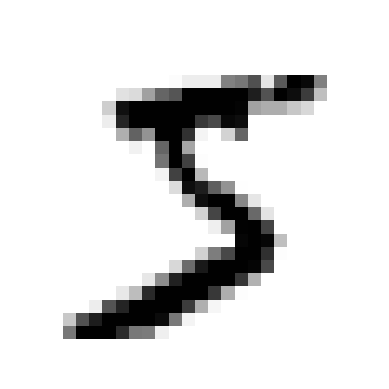

In [29]:
%matplotlib inline
# plot this data to see the image
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

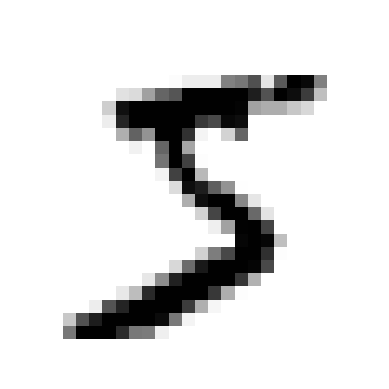

In [34]:
# check with interpolation = "nearest"
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [30]:
# This looks like five. Check the target value
y[0]

'5'

In [31]:
# Label seems to be in string format 
type(y[0])

str

In [32]:
import numpy as np 
# target is string however ML needs data in int. Covert the dataformat 
y = y.astype(np.uint8)

In [33]:
y[0]

np.uint8(5)

### Create list of digits

In [35]:
def plot_digit(data):
    """ Plot the digit for given data """
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=mpl.cm.binary, interpolation='nearest')
    plt.axis('off')

In [50]:
np.zeros((2, 2*3))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [ ]:
def plot_digits(instances, images_per_row=10, **options): 
    """ Plot digits in the given instance """

    size=28

    # get the image per row as minium of images_per_row and instance length passed 
    images_per_row=min(len(instances), images_per_row)
    print ('images_per_row:', images_per_row)

    # resize the images to 28x28 as images will be 784 ndarray format for all instanes say 100 instances sent then this list willl have 100 images details
    images=[instance.reshape(size, size) for instance in instances]

    # get the number of rows needed considering image per row to be 10 
    n_rows = ((len(instances) - 1) // images_per_row) + 1
    print ('n_rows:', n_rows, 'len(instance)', len(instances))

    # create a list of images for a row 
    row_images = [] 

    # get number of empty cells in the output 
    n_empty = n_rows * images_per_row - len(instances)
    print('n_empty:', n_empty)

    # append the image list for empty cells of size 28 pixel height and 28 * n_empty cells width
    images.append(np.zeros((size, size * n_empty)))

    # get for the range for all rows 
    for row in range(n_rows):
        print('row:', row)
        # get the images one by one images[0:1], images[1:2]... images[nrows-2:nrows-1]
        rimages = images[row * images_per_row : (row+1) * images_per_row]
        
        # append al the images in the rows at row level
        row_images.append(np.concatenate(rimages, axis=1))
        print ('len(row_images):', len(row_images))
    
    # concatenate all the row images at vertical column level
    image = np.concatenate(row_images, axis=0)
    print ('len(image):', len(image))

    plt.imshow(image, cmap=mpl.cm.binary, **options)
    plt.axis("off")

images_per_row: 12
n_rows: 5 len(instance) 50
n_empty: 10
row: 0
len(row_images): 1
row: 1
len(row_images): 2
row: 2
len(row_images): 3
row: 3
len(row_images): 4
row: 4
len(row_images): 5
len(image): 140


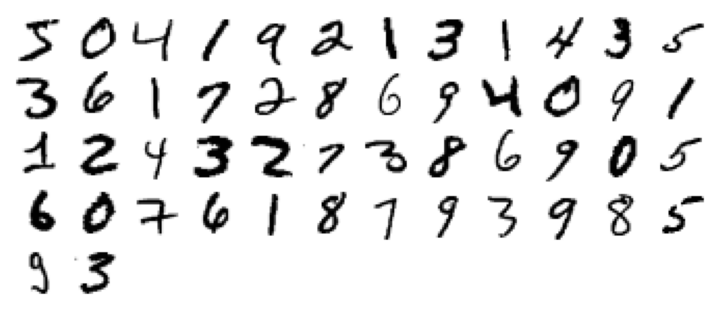

In [58]:
plt.figure(figsize=(9, 9))
example_images = X[:50]
plot_digits(example_images, images_per_row=12)
plt.show()

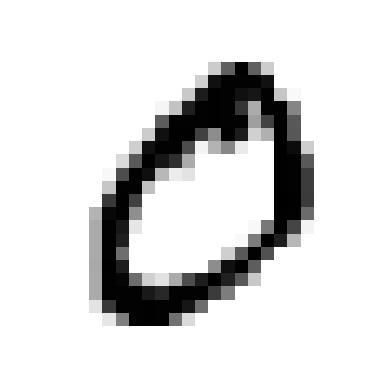

In [57]:
# plot standalone picture 
plot_digit(X[1])

# Split Train and test set 

MNIST dataset is already split into training and test set. first 60000 is the training set and 10000 is the test set

In [62]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training Binary Classifier - Detect image is 5 or not 5

In [ ]:
# Set True for number 5 and False for any other number in the target
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

### Picking the model - We will use SGD (Stochastic Gradient Descent Classifier)
``` 
This is because SGDClassifier can handle large volume of data very efficiently. It does it by dealing with training instances independently i.e. one at a time. 
Makes SGDClassifier ideal for online training as well! 
``` 

In [66]:
# Mark 
y_train == 5

array([ True, False, False, ...,  True, False, False])

In [64]:
len(X_train)

60000

In [65]:
len(y_train_5)

60000

In [67]:
from sklearn.linear_model import SGDClassifier

# create SGD classifier model. SGD relies on randomness for training. Thus name is Stochastic. 
sgd_clf = SGDClassifier(random_state=42)

# Train the model with all data and provide True for number 5 and False for non-5  numbers to the classifier
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

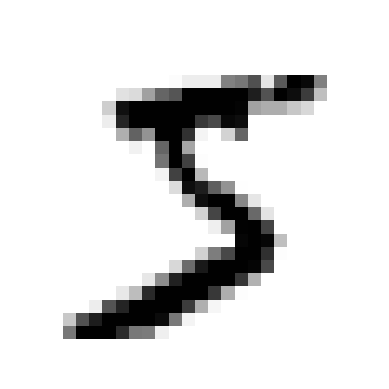

In [68]:
# Let's predict some digit
plot_digit(some_digit)

In [181]:
some_digit

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [69]:
# give 5 as input
sgd_clf.predict([some_digit])

array([ True])

array([False])

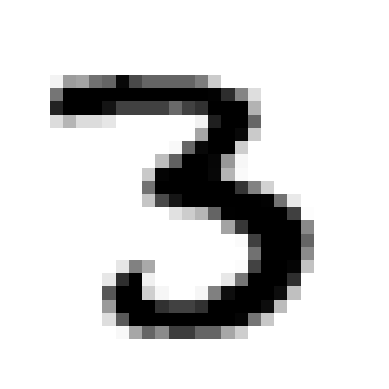

In [70]:
# give 3 as input
plot_digit(X[12])
sgd_clf.predict([X[12]])

array([ True])

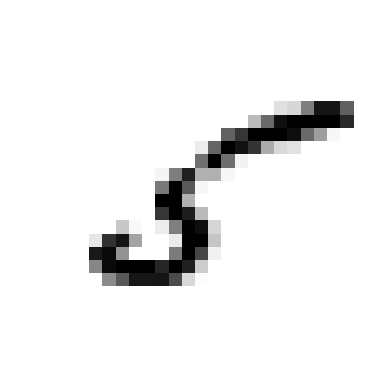

In [71]:
# give 5 again as input 
plot_digit(X[11])
sgd_clf.predict([X[11]])

# Measuring Binary Classfier Performance

Measuring perforamnce of Classifier is always tricker than for regressor. We can choose for cross validation technique to measure the performance, but scikit donot offer more control over the cross validation. You may want to create your own cross validation process

In [73]:
# Measuring performance using Cross Validation - this is simplified version of scikit cross_val_score method
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone 

# Create Stratified K Fold with number of folds = 3
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

index = 0 

# iterate over each fold 
for train_index, test_index in skfolds.split(X_train, y_train_5):

    # set the classifier to SGD Binary classifer 
    clone_clf = clone(sgd_clf)

    # Get the training indexes 
    X_train_folds = X_train[train_index]

    # Get the training labels 
    y_train_folds = y_train_5[train_index]

    # Get the testing indexes 
    X_test_fold = X_train[test_index]

    # get the testing labels 
    y_test_fold = y_train_5[test_index]

    # fit the values to our binary classifier
    clone_clf.fit(X_train_folds, y_train_folds)

    # make prediction using testing set 
    y_pred = clone_clf.predict(X_test_fold)

    # Get total number of correct predictions 
    n_correct = sum(y_pred == y_test_fold)

    # Get the propotion of correct predictions made
    print (f"Fold {index} Propotion:", n_correct/len(y_pred))

    index+=1

Fold 0 Propotion: 0.9669
Fold 1 Propotion: 0.91625
Fold 2 Propotion: 0.96785


In [74]:
# same as above can be reached with below code 
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

### 95% accuracy!!! Lets check the dumb classifier i.e. not-5

In [75]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass 
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)


In [76]:
# checking the base estimator class 
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

``` 
Non-5 classifier is over 90%. And as per the book there are over 10% of images which are 5s in MNIST dataset. 
This means if you have guessed each and every image in MNIST as non-5 then you will be 90% times right
``` 

# Performance measure using Confusion Matrix
```
Accuracy is not a good way to evaluate performance of a classifier. We need some method like confusion matrix to check the performance of the Model. 
Confusion Matrix - Count the number of times instances of Class A is classified as instance of class B. E.g. Number 5 is classified as 3
```

In [77]:
# to create confusion martix - y_prediction is needed. 
# this can be done using cross_val_predict method.
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [83]:
from sklearn.metrics import confusion_matrix
labels = np.unique(y_train_5)
binary_classifier_5_cm = confusion_matrix(y_train_5, y_train_pred, labels=labels)

In [88]:
binary_classifier_5_cm

array([[53892,   687],
       [ 1891,  3530]])

``` 
Each row represents actual class and each column represents predicted class 
``` 

In [87]:
import pandas as pd
pd.DataFrame(binary_classifier_5_cm, index=labels, columns=labels)

,False,True
False,53892,687
True,1891,3530


``` 
Taking reference of above. 53892 Class Non-5 instances are classified correctly as non-5. 687 class Non-5 are classified as class 5 
1891 class 5 instances are incorrectly classified as Non-5. And 3530 instances of class 5 is classified correctly as class 5
```

# Confusion Matrix 
$$\begin{bmatrix} TN & FP \\ FN & TP \end{bmatrix}$$
<br> <br>

    1. Each row in Confusion Matrix refers to "Actual Class". First row indicates non-5 class - Negative Class & second row indicates 5 Class - Positive class.
    2. Each Column in Confusion Matrix refers to "Predicted Class". First Cloumn indicates non-5 predicted class - Negative class and second column indicates predicted 5 class 


    a. TN - True Negatives: are non-5 which are classified correctly as non-5 
    b. FP - False Positives: are non-5 which are incorrectly classified as 5 
    c. FN - False Negatives: are 5 which are incorrectly classified as non-5
    d. TP - True Positives: are 5 which are correctly classified as 5

In [89]:
# Perfect Confusion matrix 
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]])

### Precision & Recall 

1. Precision: accuracy of positive prediction i.e. 
    Precision = $$\frac {TP}{FP + TP} $$

2. Recall: Ratio of positive instances that are correctly detected by the classifier 
    Recall = $$\frac {TP} {FN + TP} $$

In [90]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [91]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

```
this doesnot looks that great now -
1. The model if claims the image is 5 -> it is right about 83.7% of time 
2. Also, The model is only able to identify 65% of 5s
```

### F1 Score - 
```
is harmonic mean of Precision & Recall. Regular mean gives equal weights to each instance, however harmonic mean gives more weights to lower value. This means F1 score will be higher if both Precision and Recall values are higher
``` 

$$ F1 Score = \frac {2} {{1/Precision} + {1/Recall}}$$
$$ F1 Score = \frac {2 * Precision * Recall} {Precision + Recall}$$
$$ F1 Score = \frac {TP}{TP + {(FN + TP)/2}}$$

In [92]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343847

### SGDClassifier - Precision & Recall Tradeoffs
SGDClassifier make use of decision function to make clasification decisions. For each instance it computes a score based on decision function. If score is greater than the thershold - it assigns positive class else negative class is assigned. <br>
If thershold value is at higher side it may yield higher precision but lower recall value. <br>
There is absolutely no way in scikit learn to change thershold value. <br>
However, what thershold value is model using - you can use decision_fuction() method which returns score for each instance. <br>


In [93]:
y_scores = sgd_clf.decision_function([some_digit])

In [94]:
y_scores

array([2164.22030239])

In [95]:
# Say thershold value is zero then lets see what is prediction made
thershold=0
y_some_digit_prediction = (y_scores > thershold)
y_some_digit_prediction

array([ True])

In [96]:
# for higher value of thershold 
thershold=8000 
y_some_digit_prediction = (y_scores > thershold)
y_some_digit_prediction

array([False])

### So higher the thershold recall will reduce. So that should be the Thershold value? 
Steps below <br> 
    1. Use cross_val_predict() function to get scores for each instance. Use method="decision_function" instead of predict. <br>
    2. Plot precision_recall_curve() for thershold values. <br>
    3. Another method is just plot precision_recall_curve()

In [97]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [98]:
from sklearn.metrics import precision_recall_curve

# get prevision, recall and threshold values from the precision recall curve 
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

# plot precesion vs recall vs threshold
def plot_precision_recall_vs_thershold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-50000, 50000, 0, 1])  


In [99]:
precisions[:10]

array([0.09035   , 0.09035151, 0.09035301, 0.09035452, 0.09035602,
       0.09035753, 0.09035904, 0.09036054, 0.09036205, 0.09036355])

In [100]:
recalls[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [101]:
thresholds[:10]

array([-146348.56726174, -142300.00705404, -137588.97581744,
       -137155.6264409 , -136254.05856216, -132044.52713504,
       -129170.59413105, -127012.70021086, -126868.79060084,
       -126331.16218305])

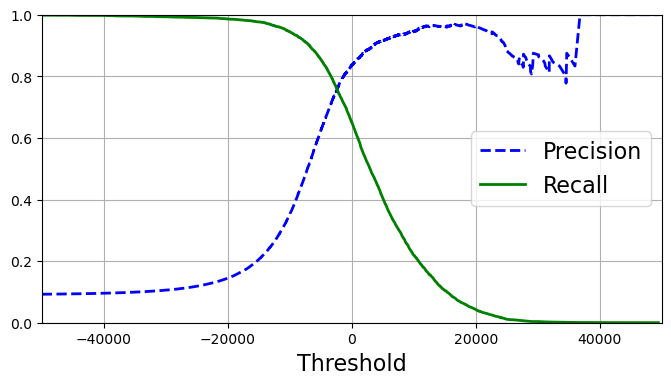

In [102]:
# plot precision and recall 
plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_thershold(precisions, recalls, thresholds)

``` 
The precision curve is lot bumpier than recall curve because when the thershold value is changed the precesion score also changes. However recall goes down only when threshold is increased. thus recall is far smoother curve than precision
```

In [104]:
# for 90% precision, get the index for recall and threshold values 
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

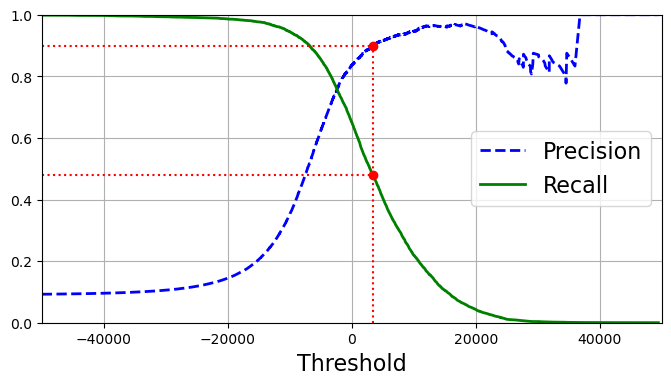

In [105]:
# plot precision and recall 
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_thershold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")
plt.plot([threshold_90_precision], [recall_90_precision], "ro")
plt.show()

In [107]:
# returns the index value where precision value is over or equal to 90%
np.argmax(precisions >= 0.90)

np.int64(57109)

In [108]:
recall_90_precision

np.float64(0.4799852425751706)

In [109]:
threshold_90_precision

np.float64(3370.019499144183)

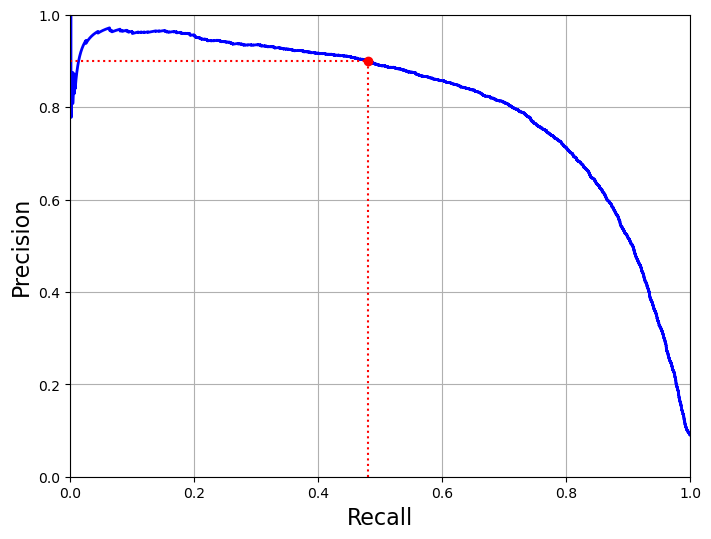

In [110]:
# Antoher way of plotting the whole thing is having recall Vs precision graph 
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

In [111]:
thershold_90_predictions = thresholds[np.argmax(precisions >= 0.9)]
y_train_pred_90 = (y_scores >= thershold_90_predictions)

print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

0.9000345901072293
0.4799852425751706


# Reciever Operating Characteristic (ROC)
    1. This is graph between True Positive Rate (TPR or Recall) against False Postive Rate (FPR).
    2. FPR is the ratio of negative instances incorrectly classified as positive. FPR is 1 minus TNR (1-TNR). 
    3. TNR is True Negative Rate, also called Specificity. TNR is the ratio of negative instances correctly classified as negative. T


$$ TPR\space Or\space Recall = \frac {TP} {FN + TP} $$
$$FPR = \frac {FP} {TN + FP} $$
$$TNR\space Or\space Specificity = \frac {TN} {TN + FP} $$
<br>
=> FPR = 1 - TNR (Specificity)

In [113]:
from sklearn.metrics import roc_curve

# get the fpr, tpr and threshold values 
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

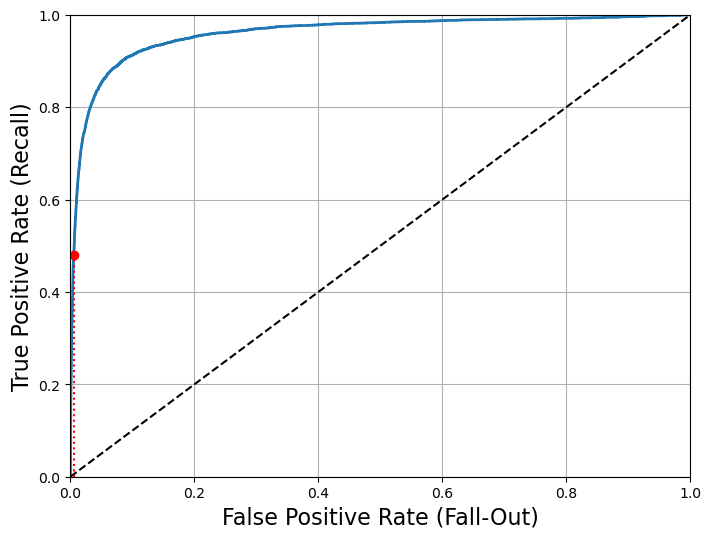

In [114]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)

    # create dashed diagnal between 0 and 1 
    plt.plot([0, 1], [0, 1], 'k--')

    # limit axis for values between 0 and 1
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

# plot ROC curve
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)

# get the fpr value using recall value at 90% precision which is recall = 0.47----
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown

plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
plt.show()

In [115]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

np.float64(0.9604938554008616)

# Evaluating Other models - Random Forest 
Compare ROC AUC of SGDClassifier against Random Forest
```
Random Forest does not have decision_function to get the scores. Instead use predict_proba() method. predict_proba() returns array containing row per instance and column per class. 
```

In [116]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_proba_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_proba_forest[:10]

array([[0.11, 0.89],
       [0.98, 0.02],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01]])

In [117]:
# get the score for positive class
y_scores_forest = y_proba_forest[:, 1]
y_scores_forest[:10]

array([0.89, 0.02, 0.04, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.01])

In [118]:
fpr_90

np.float64(0.005295076861063779)

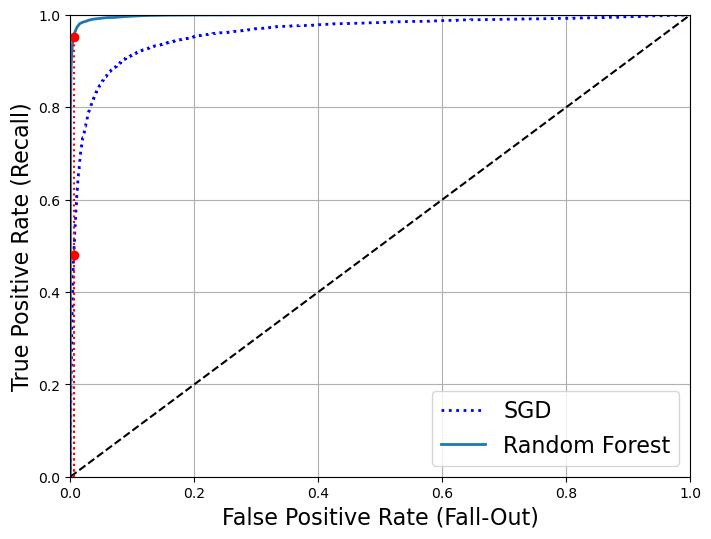

In [119]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

# get the recall value for using fpr_90 value 
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))

# plot SGD classifier values 
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")

# plot random forest values 
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")

# plot the diagram for SGD 
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")

# plot the recall value for random forest 
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()


In [120]:
roc_auc_score(y_train_5, y_scores_forest)

np.float64(0.9983296721818179)

In [121]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

### Conclusion - Random Forest classifier is better than SGD as AUC for Random forest is greater than SGD. Check its precision and recall values

In [122]:
precision_score(y_train_5, y_train_pred_forest)


0.9898819561551433

In [123]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

In [124]:
import joblib
joblib.dump(sgd_clf, '/Users/rohitabhishek/Documents/Programming_Workspace/Github-Programs/hands-on-ml/SELF/OUTPUT/Chapter3/sgd_classifier_binary.pkl')
joblib.dump(forest_clf, '/Users/rohitabhishek/Documents/Programming_Workspace/Github-Programs/hands-on-ml/SELF/OUTPUT/Chapter3/random_forest_binary.pkl')

['/Users/rohitabhishek/Documents/Programming_Workspace/Github-Programs/hands-on-ml/SELF/OUTPUT/Chapter3/random_forest_binary.pkl']

# SVC Classifier
``` 
Lets train SVC model on 5 binary model and see what score it provides
```

In [130]:
from sklearn.svm import SVC 

# create Support Vector Classifier 
svm_clf = SVC(random_state=42)

y_svc_pred = cross_val_predict(svm_clf, X_train, y_train_5, cv=3)

In [131]:
precision_score(y_train_5, y_svc_pred)

0.9842034290117511

In [132]:
recall_score(y_train_5, y_svc_pred)

0.9424460431654677

In [134]:
# let check the ROC curve 
y_svc_score = cross_val_predict(svm_clf, X_train, y_train_5, cv=3, method="decision_function")

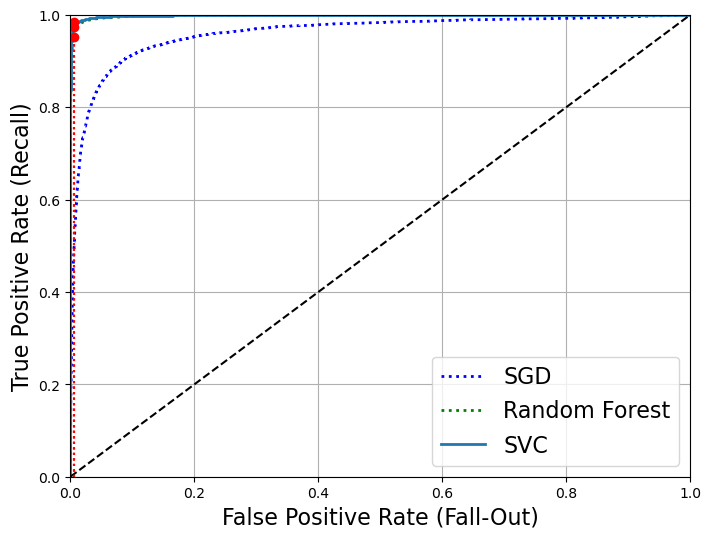

In [136]:
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_train_5, y_svc_score)
recall_for_svc = tpr_svc[np.argmax(fpr_svc >= fpr_90)]

plt.figure(figsize=(8, 6))

# plot SGD classifier values 
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")

# plot random forest values 
plt.plot(fpr_forest, tpr_forest, "g:", linewidth=2, label="Random Forest")

# plot svc values 
plot_roc_curve(fpr_svc, tpr_svc, "SVC")

# plot the diagram for SGD 
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")

# plot the recall value for random forest 
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")

# plot the recall value for random forest 
plt.plot([fpr_90, fpr_90], [0., recall_for_svc], "r:")
plt.plot([fpr_90], [recall_for_svc], "ro")

plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [137]:
roc_auc_score(y_train_5, y_svc_score)

np.float64(0.9986234183864152)

In [138]:
import joblib
joblib.dump(svm_clf, '/Users/rohitabhishek/Documents/Programming_Workspace/Github-Programs/hands-on-ml/SELF/OUTPUT/Chapter3/svm_binary.pkl')

['/Users/rohitabhishek/Documents/Programming_Workspace/Github-Programs/hands-on-ml/SELF/OUTPUT/Chapter3/svm_binary.pkl']

# Multiclass Classification 
- Binary Classification only work on 2 classes 
- Multiclass classification deals with 2 or more classes 
- SGDClassifier, Random Forest and Naive Bayes are inherently multiclass models 
- LogisticClassifier and Support Vector Machines (SVC) are strictly Binary classifiers. 

### There various strategies that can be adopted for Binary classifier to do the multiclassification. 

#### 1. One Versus Rest (also called One Versus All) - OvR strategy 
    - Use binary classifier for each digit - Zero-Detector, One-Detector, Two-Detector etc.. 
    - Then when classify the image and select the score of image for which the score is highest 

### 2. One Versus One (OvO)
    - Create classifier with combination of 2 e.g. Zero & One, Zero & Two, Zero & Three, and so on. Total N(N-1)/2 combinations possible = 45 classifiers. 
    - Select the classifier with highest score. 
    - Advantage of OvO is that training on each classifier can take only data from training for which digit needs to be identified. e.g. training Zero & One dector classifier with only zero and one images. 

### Training with 5's and not 5's 


In [140]:
from sklearn.svm import SVC 
svc_clf = SVC() 
svc_clf.fit(X_train[:1000], y_train[:1000])
svc_clf.predict([some_digit])

array([5], dtype=uint8)

In [141]:
some_digit_scores = svc_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.75828215,  2.74956232,  6.13809559,  8.2853702 , -0.28728967,
         9.30119996,  0.74228825,  3.79256174,  7.20847395,  4.85762716]])

### Notice the decision funciton score for 5 is highest 9.3. Thus predicted value is 5.
    - In the background the SVC classifier use OvO strategy and trained on 45 classifiers. got the deicision for class that scored the highest. 
    - Also you can see decision_function returned 10 classes scores instead of just one.

In [142]:
svc_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Forcing Scikit to use OvO or OvR Strategy

In [143]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [144]:
len(ovr_clf.estimators_)

10

In [145]:
ovr_clf.decision_function([some_digit])

array([[-1.34386   , -1.51948026, -1.22096067, -0.92938037, -2.00572727,
         0.6077433 , -1.62258907, -0.99975597, -1.2763794 , -1.70311184]])

# Using SGDClassifier -> Train will full data i.e. Multiclass Classifier

```
SGD Classifier directly uses multiple classes for classification. There is no need for OvO or OvR strategy here
```

In [146]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [147]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

### the model seems little confused with number 3 instead of 5. Lets cehck the cross validation score 

In [148]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

###  Lets fine tune this model with Standard scaler to reach over 89% accuracy 
``` 
By adding the scaler, the model accuracy will increase
```

In [149]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

# Using Random Forest for whole data

In [ ]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

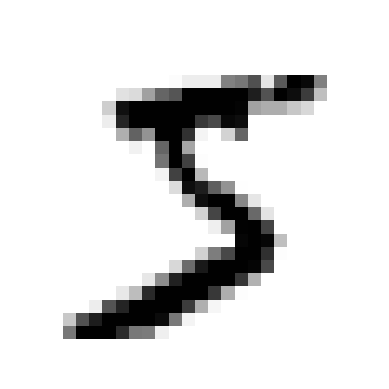

In [151]:
plot_digit(some_digit)

In [152]:
y_proba_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3, method="predict_proba")
y_proba_forest[:10]

array([[0.  , 0.  , 0.02, 0.3 , 0.  , 0.61, 0.02, 0.  , 0.03, 0.02],
       [0.99, 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.04, 0.04, 0.7 , 0.05, 0.04, 0.04, 0.01, 0.08],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.  , 0.02, 0.02, 0.93],
       [0.03, 0.01, 0.7 , 0.08, 0.01, 0.  , 0.01, 0.01, 0.12, 0.03],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.94, 0.  , 0.  , 0.01, 0.  , 0.05, 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.02, 0.93, 0.01, 0.  , 0.01, 0.01, 0.02]])

In [153]:
y_scores_forest = y_proba_forest[:, 1]

In [154]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.96455, 0.96285, 0.96625])

In [155]:
cross_val_score(forest_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.96425, 0.9627 , 0.9661 ])

# Error Analysis (SGD Classifier) - check the confusion matrix 
    - Rows represents actual class 
    - Columns represent predicted class

In [157]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

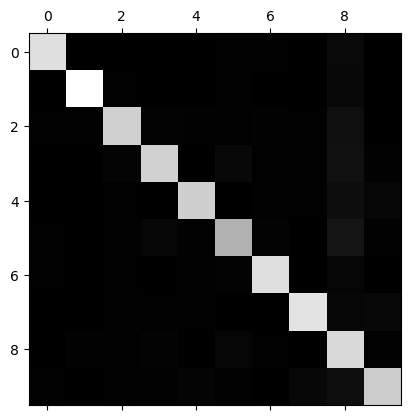

In [158]:
# the numbers may overwhelm - use matplot matshow() function to get the heatmap 
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

### The above looks good. For daigonal elements the shading is mostly white. However for number 5 the the cell is little gray. 
    - Get the number of images for coressponding class 
    - Divide the values in confusion matrix with this value 
    - This wll give the error rates instead of absolute number of errors 


In [159]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
row_sums

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]])

In [160]:
norm_conf_mx = conf_mx/row_sums

In [161]:
norm_conf_mx

array([[9.41583657e-01, 0.00000000e+00, 3.71433395e-03, 8.44166807e-04,
        1.35066689e-03, 7.25983454e-03, 6.07800101e-03, 1.01300017e-03,
        3.79875063e-02, 1.68833361e-04],
       [0.00000000e+00, 9.49273213e-01, 5.48798576e-03, 3.55977455e-03,
        5.93295758e-04, 6.52625334e-03, 5.93295758e-04, 1.03826758e-03,
        3.14446752e-02, 1.48323939e-03],
       [4.53172205e-03, 4.53172205e-03, 8.76132931e-01, 1.54414233e-02,
        1.22524337e-02, 4.53172205e-03, 1.12453844e-02, 6.04229607e-03,
        6.34441088e-02, 1.84625713e-03],
       [3.58832164e-03, 2.77279400e-03, 1.90833469e-02, 8.52552602e-01,
        3.26211059e-04, 3.31104224e-02, 4.40384929e-03, 6.52422117e-03,
        6.57315283e-02, 1.19067036e-02],
       [2.05409106e-03, 2.39643958e-03, 7.01814447e-03, 1.54056830e-03,
        8.87024991e-01, 2.05409106e-03, 5.81992468e-03, 4.62170490e-03,
        5.93974666e-02, 2.80725779e-02],
       [4.98063088e-03, 2.76701716e-03, 5.53403431e-03, 3.09905921e-02,
   

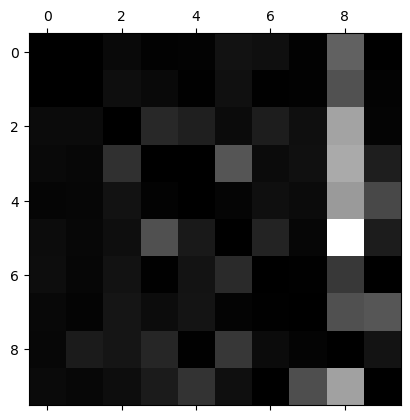

In [162]:
# visualize this in matplot - set diagonal elements to black 
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

#### From the fig above 
    - Seems lots of 5's are incorrectly classified as 8 (brightest). 
    - However, row 8 (Actual values) are getting classfied alright.
    - Also 4 are misclassified as 5  and 2,3,9, are also following the same i.e. misclassfied as 8
    - More tuning needed to reduce false 8
    - Analyzing individual errors is good way to gain insights. 

images_per_row: 5
n_rows: 5 len(instance) 25
n_empty: 0
row: 0
len(row_images): 1
row: 1
len(row_images): 2
row: 2
len(row_images): 3
row: 3
len(row_images): 4
row: 4
len(row_images): 5
len(image): 140
images_per_row: 5
n_rows: 5 len(instance) 25
n_empty: 0
row: 0
len(row_images): 1
row: 1
len(row_images): 2
row: 2
len(row_images): 3
row: 3
len(row_images): 4
row: 4
len(row_images): 5
len(image): 140
images_per_row: 5
n_rows: 5 len(instance) 25
n_empty: 0
row: 0
len(row_images): 1
row: 1
len(row_images): 2
row: 2
len(row_images): 3
row: 3
len(row_images): 4
row: 4
len(row_images): 5
len(image): 140
images_per_row: 5
n_rows: 5 len(instance) 25
n_empty: 0
row: 0
len(row_images): 1
row: 1
len(row_images): 2
row: 2
len(row_images): 3
row: 3
len(row_images): 4
row: 4
len(row_images): 5
len(image): 140


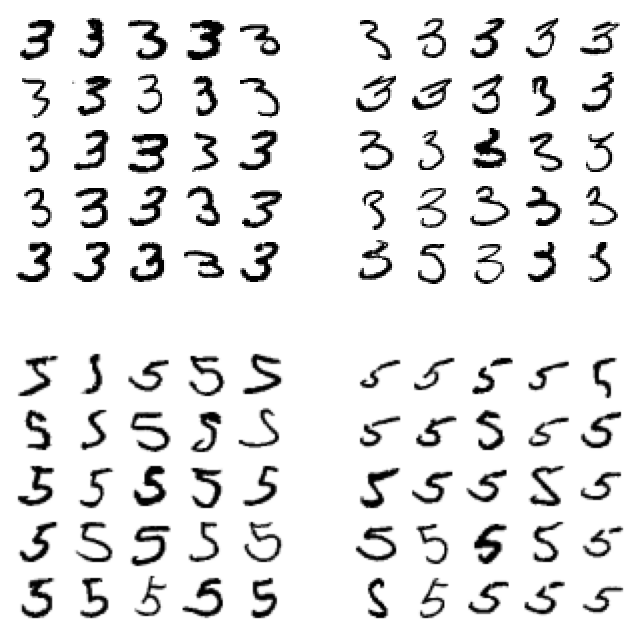

In [163]:
cl_a, cl_b = 3, 5

# classes which are 3 and classified as 3 
cl_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]

# classes which are 3 and classified as 5 
cl_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]

# classes which are 5 and classified as 3 
cl_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]

# classes which are 5 and classified as 5 
cl_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

# plot them 
plt.figure(figsize=(8, 8))
plt.subplot(221); plot_digits(cl_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(cl_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(cl_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(cl_bb[:25], images_per_row=5)

# Self - Done above for SGD Classifier. Lets do the same for Random Forest Classifier

In [164]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred_forest)
conf_mx

array([[5839,    1,   10,    2,    4,    9,   22,    1,   32,    3],
       [   1, 6632,   39,   18,   14,    4,    6,   13,   12,    3],
       [  27,   12, 5755,   26,   32,    2,   21,   37,   39,    7],
       [   9,    6,   90, 5820,    4,   66,    6,   42,   56,   32],
       [  13,   13,   12,    0, 5646,    0,   30,   14,   21,   93],
       [  25,   10,    9,   66,   12, 5182,   52,    5,   39,   21],
       [  32,   11,    5,    0,   12,   45, 5797,    0,   16,    0],
       [   7,   24,   58,    7,   35,    0,    0, 6044,   10,   80],
       [  11,   37,   34,   55,   27,   50,   29,    5, 5526,   77],
       [  22,   10,   15,   79,   80,   20,    4,   60,   39, 5620]])

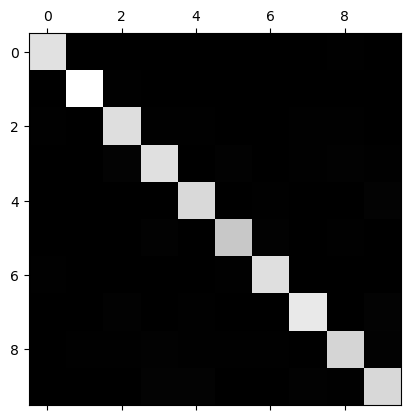

In [165]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

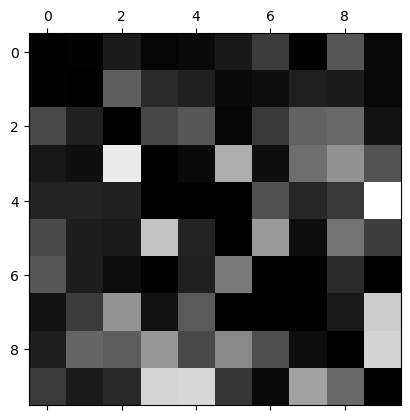

In [166]:
norm_conf_mx = conf_mx/row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

images_per_row: 5
n_rows: 5 len(instance) 25
n_empty: 0
row: 0
len(row_images): 1
row: 1
len(row_images): 2
row: 2
len(row_images): 3
row: 3
len(row_images): 4
row: 4
len(row_images): 5
len(image): 140
images_per_row: 5
n_rows: 5 len(instance) 25
n_empty: 0
row: 0
len(row_images): 1
row: 1
len(row_images): 2
row: 2
len(row_images): 3
row: 3
len(row_images): 4
row: 4
len(row_images): 5
len(image): 140
images_per_row: 5
n_rows: 5 len(instance) 25
n_empty: 0
row: 0
len(row_images): 1
row: 1
len(row_images): 2
row: 2
len(row_images): 3
row: 3
len(row_images): 4
row: 4
len(row_images): 5
len(image): 140
images_per_row: 5
n_rows: 5 len(instance) 25
n_empty: 0
row: 0
len(row_images): 1
row: 1
len(row_images): 2
row: 2
len(row_images): 3
row: 3
len(row_images): 4
row: 4
len(row_images): 5
len(image): 140


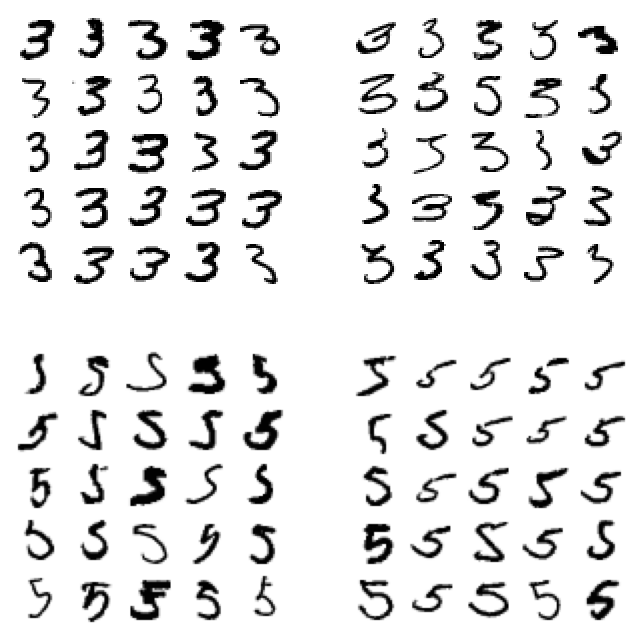

In [167]:
cl_a, cl_b = 3, 5

# classes which are 3 and classified as 3 
cl_aa = X_train[(y_train == cl_a) & (y_train_pred_forest == cl_a)]

# classes which are 3 and classified as 5 
cl_ab = X_train[(y_train == cl_a) & (y_train_pred_forest == cl_b)]

# classes which are 5 and classified as 3 
cl_ba = X_train[(y_train == cl_b) & (y_train_pred_forest == cl_a)]

# classes which are 5 and classified as 5 
cl_bb = X_train[(y_train == cl_b) & (y_train_pred_forest == cl_b)]

# plot them 
plt.figure(figsize=(8, 8))
plt.subplot(221); plot_digits(cl_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(cl_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(cl_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(cl_bb[:25], images_per_row=5)

# SVM Classifier - Error Analysis

In [ ]:
# this will take very long.... SVC will convert this to OvO strategy and then perform the 
# classification 
svc_clf = SVC(random_state=42)
svc_clf.fit(X_train, y_train)
y_train_pred_svc = cross_val_predict(svc_clf, X_train_scaled, y_train, cv=3)

In [169]:
svc_clf.predict([some_digit])

array([5], dtype=uint8)

In [170]:
# create confusion matrix 
conf_mx = confusion_matrix(y_train, y_train_pred_svc)
conf_mx

array([[5809,    3,   20,    8,    6,   13,   32,   14,   17,    1],
       [   1, 6620,   37,   12,   11,    0,    7,   31,   13,   10],
       [  20,   18, 5721,   42,   27,    4,   20,   61,   36,    9],
       [   3,   15,   83, 5778,    5,   64,    2,   87,   73,   21],
       [   5,   11,   45,    2, 5623,    6,   21,   25,   10,   94],
       [  14,   11,   16,   77,   17, 5134,   58,   50,   28,   16],
       [  20,    7,   22,    0,   13,   39, 5743,   55,   19,    0],
       [   9,   24,   37,   15,   39,    1,    0, 6070,    5,   65],
       [  19,   44,   42,   50,   20,   52,   26,   40, 5533,   25],
       [  11,   10,   25,   49,   81,   12,    1,  153,   22, 5585]])

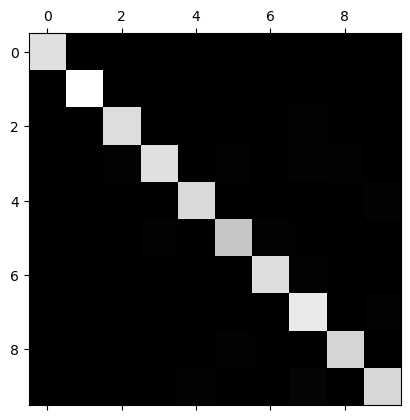

In [171]:
# the numbers may overwhelm - use matplot matshow() function to get the heatmap 
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

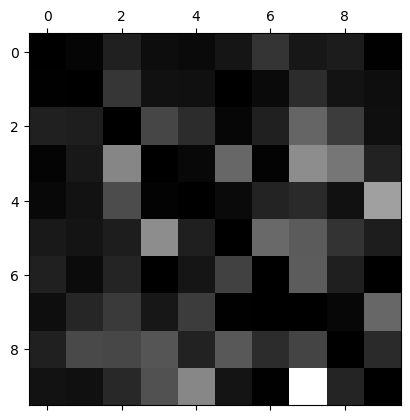

In [172]:
norm_conf_mx = conf_mx/row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

images_per_row: 5
n_rows: 5 len(instance) 25
n_empty: 0
row: 0
len(row_images): 1
row: 1
len(row_images): 2
row: 2
len(row_images): 3
row: 3
len(row_images): 4
row: 4
len(row_images): 5
len(image): 140
images_per_row: 5
n_rows: 5 len(instance) 25
n_empty: 0
row: 0
len(row_images): 1
row: 1
len(row_images): 2
row: 2
len(row_images): 3
row: 3
len(row_images): 4
row: 4
len(row_images): 5
len(image): 140
images_per_row: 5
n_rows: 5 len(instance) 25
n_empty: 0
row: 0
len(row_images): 1
row: 1
len(row_images): 2
row: 2
len(row_images): 3
row: 3
len(row_images): 4
row: 4
len(row_images): 5
len(image): 140
images_per_row: 5
n_rows: 5 len(instance) 25
n_empty: 0
row: 0
len(row_images): 1
row: 1
len(row_images): 2
row: 2
len(row_images): 3
row: 3
len(row_images): 4
row: 4
len(row_images): 5
len(image): 140


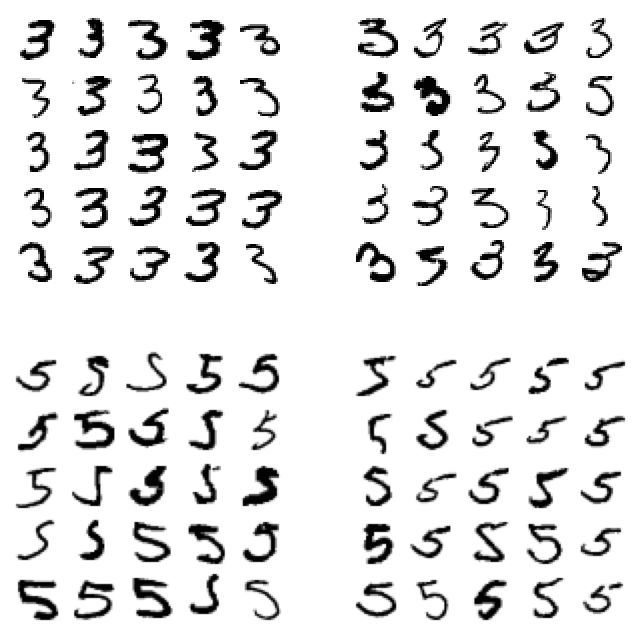

In [173]:
cl_a, cl_b = 3, 5

# classes which are 3 and classified as 3 
cl_aa = X_train[(y_train == cl_a) & (y_train_pred_svc == cl_a)]

# classes which are 3 and classified as 5 
cl_ab = X_train[(y_train == cl_a) & (y_train_pred_svc == cl_b)]

# classes which are 5 and classified as 3 
cl_ba = X_train[(y_train == cl_b) & (y_train_pred_svc == cl_a)]

# classes which are 5 and classified as 5 
cl_bb = X_train[(y_train == cl_b) & (y_train_pred_svc == cl_b)]

# plot them 
plt.figure(figsize=(8, 8))
plt.subplot(221); plot_digits(cl_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(cl_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(cl_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(cl_bb[:25], images_per_row=5)

# Multilabel Classification

In [174]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [175]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [176]:
# y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
# f1_score(y_multilabel, y_train_knn_pred, average="macro")

# Multioutput Classification 


In [177]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

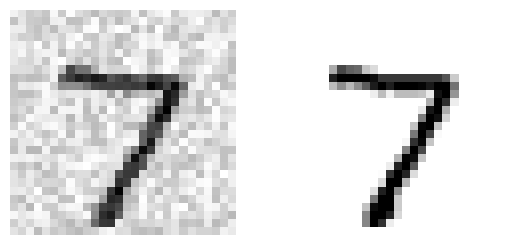

In [178]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

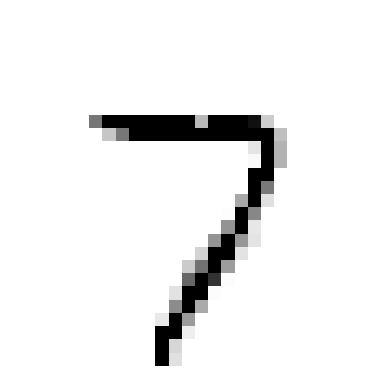

In [179]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)


# Save the models 

``` 
Use these models in Number Recoginition program 
``` 

In [180]:
joblib.dump(svc_clf, '/Users/rohitabhishek/Documents/Programming_Workspace/Github-Programs/hands-on-ml/SELF/OUTPUT/Chapter3/svc_clf_full.pkl')
joblib.dump(sgd_clf, '/Users/rohitabhishek/Documents/Programming_Workspace/Github-Programs/hands-on-ml/SELF/OUTPUT/Chapter3/sgd_clf_full.pkl')
joblib.dump(forest_clf, '/Users/rohitabhishek/Documents/Programming_Workspace/Github-Programs/hands-on-ml/SELF/OUTPUT/Chapter3/forest_clf_full.pkl')

['/Users/rohitabhishek/Documents/Programming_Workspace/Github-Programs/hands-on-ml/SELF/OUTPUT/Chapter3/forest_clf_full.pkl']

# Exercises 

``` 
Q1 & 2 are left out because it will take a lot of time for my computer... Tried on collab
```

### Q3: Tackle Titanic dataset 
```
GOAL - Using attributes like age, sex, passanger class, where they embarked on and so on 
Predict if passanger survived or not?
```

#### Step 1 - Get data

In [326]:
import os
import urllib.request

TITANIC_PATH = "/Users/rohitabhishek/Documents/Programming_Workspace/Github-Programs/hands-on-ml/SELF/DATA/Chapter3"
DOWNLOAD_URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/titanic/"

def fetch_titanic_data(url=DOWNLOAD_URL, path=TITANIC_PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    
    for filename in ("train.csv", "test.csv"):
        filepath = os.path.join(path, filename)
        if not os.path.isfile(filepath):
            print("Downloading", filename)
            urllib.request.urlretrieve(url + filename, filepath)

fetch_titanic_data()    

In [327]:
# load the training set to dataframe 
train_data = pd.read_csv(os.path.join(TITANIC_PATH, "train.csv"))
test_data = pd.read_csv(os.path.join(TITANIC_PATH, "test.csv"))

In [328]:
# understand the data in training set 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [329]:
# Age is missing for some of the passangers, Cabin data is just 204! and Embarking data is missing for one passanger. Look at first few rows 
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


```
The attributes have the following meaning:

PassengerId: a unique identifier for each passenger
Survived: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
Pclass: passenger class.
Name, Sex, Age: self-explanatory
SibSp: how many siblings & spouses of the passenger aboard the Titanic.
Parch: how many children & parents of the passenger aboard the Titanic.
Ticket: ticket id
Fare: price paid (in pounds)
Cabin: passenger's cabin number
Embarked: where the passenger embarked the Titanic
```

In [330]:
# update the index of the dataframe to passanger id 
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

#### Step 2: Prepare the data

In [331]:
# Focus on age which has missing value
train_data[train_data['Age'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen 'Nellie'",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith 'Dolly'",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [332]:
# find median age for male passanger in 1st, 2nd and 3rd class 
train_data[(train_data['Pclass'] == 1) & (train_data['Sex'] == 'male')]['Age'].median(), \
train_data[(train_data['Pclass'] == 2) & (train_data['Sex'] == 'male')]['Age'].median(), \
train_data[(train_data['Pclass'] == 3) & (train_data['Sex'] == 'male')]['Age'].median()

(40.0, 30.0, 25.0)

In [333]:
# find median age for female passanger in 1st, 2nd and 3rd class 
train_data[(train_data['Pclass'] == 1) & (train_data['Sex'] == 'female')]['Age'].median(), \
train_data[(train_data['Pclass'] == 2) & (train_data['Sex'] == 'female')]['Age'].median(), \
train_data[(train_data['Pclass'] == 3) & (train_data['Sex'] == 'female')]['Age'].median()

(35.0, 28.0, 21.5)

#### Create custom imputer class 

In [287]:
def update_median_age(titanic_data=pd.DataFrame(), sex="male", passanger_class=1):
    """ method to update the median age for passanger using median value of passanger from given sex and passanger class"""

    # print(passanger_class)
    if passanger_class > 3: 
        return titanic_data 
            
    # for first class passangers 
    # print (titanic_data[(titanic_data['Pclass'] == passanger_class) & (titanic_data['Sex'] == sex)]['Age'].median())
    titanic_data.loc[(titanic_data['Age'].isna()) & (titanic_data['Pclass'] == passanger_class) & (titanic_data['Sex'] == sex), 'Age'] = titanic_data[(titanic_data['Pclass'] == passanger_class) & (titanic_data['Sex'] == sex)]['Age'].median()

    # call the update_median_age recursively to update for other calss 
    passanger_class += 1
    return update_median_age(titanic_data, sex=sex, passanger_class=passanger_class) 


In [335]:
# update the training for missing age
train_data = update_median_age(train_data, sex="male")
train_data = update_median_age(train_data, sex="female")

In [336]:
# update the test data for missing age 
test_data = update_median_age(test_data, sex="male")
test_data = update_median_age(test_data, sex="female")

In [337]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.112421,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.304432,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.500000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [338]:
# looks like embark is a categorical data 
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [339]:
# bring all the numerical data to common scale
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ("scaler", StandardScaler())
    ])


In [340]:
# create pipeline for categorical data like age, emabarked 
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder())
    ])

In [341]:
# check if there are correlation among numerical columns 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [342]:
numerical_cols = ["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]
corr_matrix = train_data[numerical_cols].corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.059580
Pclass     -0.338481
Name: Survived, dtype: float64

In [343]:
corr_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.059580,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.413583,0.083081,0.018443,-0.549500
Age,-0.059580,-0.413583,1.000000,-0.249854,-0.175526,0.122692
SibSp,-0.035322,0.083081,-0.249854,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.175526,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.122692,0.159651,0.216225,1.000000


<Axes: >

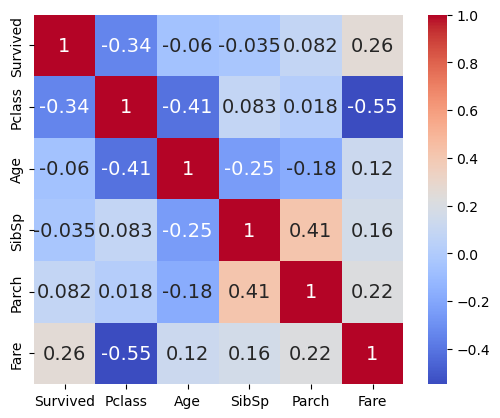

In [344]:
import seaborn as sns 

sns.heatmap(corr_matrix, annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})

In [345]:
# create full data pipeline for numerical and categorical data 
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [346]:
X_train = preprocess_pipeline.fit_transform(train_data[num_attribs + cat_attribs])

In [ ]:
# set the y_train to surivived 
y_train = train_data["Survived"]

In [357]:
y_train.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# check the model 
``` 
This is supervised learning, batch learning, and classification task. We want to classify the data based to different class of Survived. 
0 -> did not survive 
1 -> survived  
```

#### Try Random Forest Classifier

In [365]:
from sklearn.ensemble import RandomForestClassifier

titanic_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
titanic_forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# perform error analysis
y_train_pred = cross_val_predict(titanic_forest_clf, X_train, y_train, cv=10)

In [361]:
precision_score(y_train, y_pred)

0.7716049382716049

In [362]:
recall_score(y_train, y_pred)

0.7309941520467836

In [366]:
y_score = cross_val_score(titanic_forest_clf, X_train, y_train, cv=10)

In [367]:
y_score.mean()

np.float64(0.8137702871410737)

In [368]:
roc_auc_score(y_train, y_pred)

np.float64(0.7981018119068162)

In [381]:
# create confusion matrix 
conf_mx = confusion_matrix(y_train, y_pred)
conf_mx

array([[475,  74],
       [ 92, 250]])

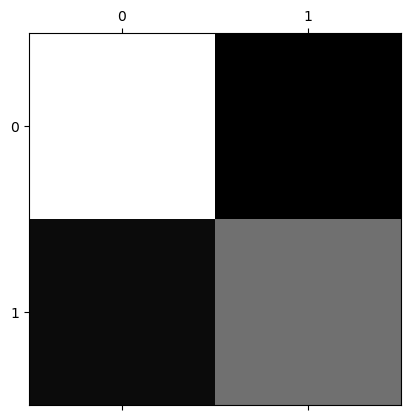

In [382]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [372]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [324]:
# lets try with test data using the same classifier 
X_test = preprocess_pipeline.transform(test_data[num_attribs + cat_attribs])
y_test_pred = titanic_forest_clf.predict(X_test)

``` 
There is no surviver feture in the test dataset. You cannot perform validation on this


# Trying SVC

In [373]:
from sklearn.svm import SVC

titanic_svc_clf = SVC(gamma="auto")   # will use 1/n_features
titanic_svc_clf.fit(X_train, y_train)

SVC(gamma='auto')

In [374]:
# perform error analysis
y_train_pred_svc = cross_val_predict(titanic_svc_clf, X_train, y_train, cv=10)

In [375]:
precision_score(y_train, y_train_pred_svc)

0.8073089700996677

In [376]:
recall_score(y_train, y_train_pred_svc)

0.7105263157894737

In [389]:
# get the y_scores 
y_score_svc = cross_val_score(titanic_svc_clf, X_train, y_train, cv=10)

In [390]:
y_score_svc.mean()

np.float64(0.8238077403245943)

In [391]:
roc_auc_score(y_train, y_train_pred_svc)

np.float64(0.8024398427763397)

In [392]:
# create confusion matrix 
conf_mx_svc = confusion_matrix(y_train, y_train_pred_svc)
print("SVC Confusion Matrix:\n", conf_mx_svc)
print("Random Forest Confusion Matrix:\n", conf_mx)

SVC Confusion Matrix:
 [[491  58]
 [ 99 243]]
Random Forest Confusion Matrix:
 [[475  74]
 [ 92 250]]


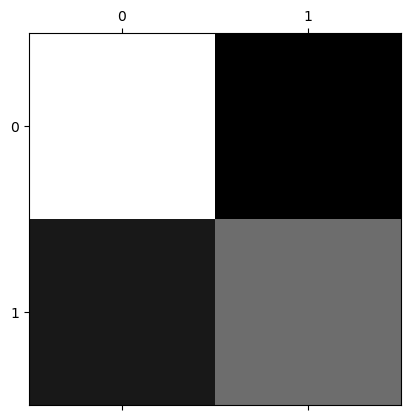

In [393]:
# Let's plot the confusion matrix for SVC 
plt.matshow(conf_mx_svc, cmap=plt.cm.gray)
plt.show()

# Compare the scores from SVC and Random Forest

/var/folders/kx/s0nzgxq96zgdm61_51783vnm0000gn/T/ipykernel_154/176124825.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([y_score_svc, y_score], labels=("SVM","Random Forest"))


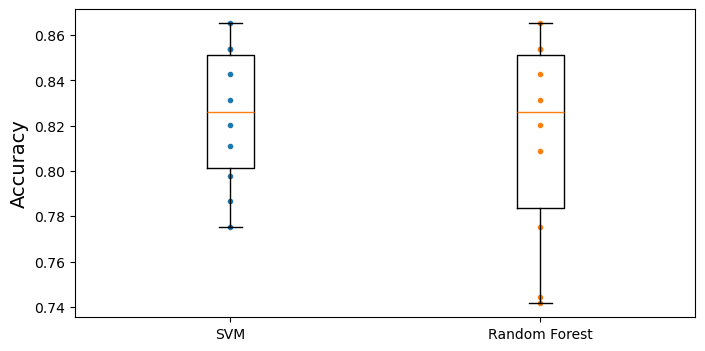

In [395]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot([1]*10, y_score_svc, ".")
plt.plot([2]*10, y_score, ".")
plt.boxplot([y_score_svc, y_score], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

``` 
Random forest is yeilding high score but lower overall mean. Also, in confusion matrix we can see True Positives have come down for Random forest. So SVM classifier will generalize well compared to Random Forest. 
````

In [397]:
# Dig little deep in the data for example, We can see what age bucket range has more survival chances
train_data["Age"].mean()

np.float64(29.112420538720542)

In [401]:
train_data["Age_Category"] = pd.cut(
    train_data["Age"], bins=[0, 15, 30, 45, 60, 75, 90, np.inf], labels=[0, 15, 30, 45, 60, 75, 90]
)

In [402]:
train_data["Age_Category"].value_counts()

Age_Category
15    473
30    232
0      83
45     81
60     21
75      1
90      0
Name: count, dtype: int64

In [404]:
# check the highest surviving age group 
train_data[["Age_Category", "Survived"]].groupby(["Age_Category"]).mean()

/var/folders/kx/s0nzgxq96zgdm61_51783vnm0000gn/T/ipykernel_154/3114049397.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_data[["Age_Category", "Survived"]].groupby(["Age_Category"]).mean()


,Survived
Age_Category,
0,0.590361
15,0.327696
30,0.431034
45,0.407407
60,0.190476
75,1.000000
90,NaN


In [405]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    float64 
 5   SibSp         891 non-null    int64   
 6   Parch         891 non-null    int64   
 7   Ticket        891 non-null    object  
 8   Fare          891 non-null    float64 
 9   Cabin         204 non-null    object  
 10  Embarked      889 non-null    object  
 11  Age_Category  891 non-null    category
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 84.7+ KB


In [417]:
# check the fare for each embarked place 
train_data[train_data["Pclass"] == 1][["Embarked", "Fare"]].groupby(["Embarked"]).max()

,Fare
Embarked,
C,512.3292
Q,90.0000
S,263.0000


In [418]:
train_data[train_data["Pclass"] == 1][["Embarked", "Fare"]].groupby(["Embarked"]).mean()

,Fare
Embarked,
C,104.718529
Q,90.000000
S,70.364862


In [407]:
train_data[train_data["Embarked"].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category
PassengerId,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,30
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,60


In [416]:
train_data[train_data["Fare"] >= 80.0]["Pclass"].value_counts()

Pclass
1    76
Name: count, dtype: int64

# Spam email

In [ ]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "http://spamassassin.apache.org/old/publiccorpus/"
HAM_URL = DOWNLOAD_ROOT + "20030228_easy_ham.tar.bz2"
SPAM_URL = DOWNLOAD_ROOT + "20030228_spam.tar.bz2"
SPAM_PATH = os.path.join("/Users/rohitabhishek/Documents/Programming_Workspace/Github-Programs/hands-on-ml/SELF/DATA/Chapter3", "spam")

def fetch_spam_data(ham_url=HAM_URL, spam_url=SPAM_URL, spam_path=SPAM_PATH):

    # check the folder exists or not; create one if not present 
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)

    # get the filename and filename url 
    for filename, url in (("ham.tar.bz2", ham_url), ("spam.tar.bz2", spam_url)):
        path = os.path.join(spam_path, filename)

        # check if file exists 
        if not os.path.isfile(path):
            urllib.request.urlretrieve(url, path)

        # open the downloaded tar file 
        tar_bz2_file = tarfile.open(path)

        # extract tar file content
        tar_bz2_file.extractall(path=spam_path)
        tar_bz2_file.close()

fetch_spam_data()

In [ ]:
# create HAM and SPAM directory.
HAM_DIR = os.path.join(SPAM_PATH, "easy_ham")
SPAM_DIR = os.path.join(SPAM_PATH, "spam")

# get all files from ham & spam directory if file name length is over 20 byes 
ham_filenames = [name for name in sorted(os.listdir(HAM_DIR)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name) > 20]

In [ ]:
# get total files for ham and spam 
len(ham_filenames), len(spam_filenames)

(2500, 500)

In [ ]:
# use python email package to parse emails 
import email 
import email.policy 

def load_emails(is_spam, file_name, spam_path=SPAM_PATH):
    """ Load emails """

    # check if directory is spam or ham 
    directory = "spam" if is_spam else "easy_ham"

    # load email files and return the email content using email package 
    with open(os.path.join(spam_path, directory, file_name), "rb") as fp:
        return email.parser.BytesParser(policy=email.policy.default).parse(fp)

In [ ]:
# get ham and spam emails 
ham_emails = [load_emails(is_spam=False, file_name=file_name) for file_name in ham_filenames]
spam_emails = [load_emails(is_spam=True, file_name=file_name) for file_name in spam_filenames]

In [469]:
# check one of the ham email 
print(ham_emails[0].get_content().strip())

Date:        Wed, 21 Aug 2002 10:54:46 -0500
    From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>
    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>


  | I can't reproduce this error.

For me it is very repeatable... (like every time, without fail).

This is the debug log of the pick happening ...

18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury}
18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury
18:19:04 Ftoc_PickMsgs {{1 hit}}
18:19:04 Marking 1 hits
18:19:04 tkerror: syntax error in expression "int ...

Note, if I run the pick command by hand ...

delta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury
1 hit

That's where the "1 hit" comes from (obviously).  The version of nmh I'm
using is ...

delta$ pick -version
pick -- nmh-1.0.4 [compiled on fuchsia.cs.mu.OZ.AU at Sun Mar 17 14:55:56 

In [470]:
# try to print multipart email - this will error out! 
print(ham_emails[13].get_content().strip())

KeyError: 'multipart/signed'

In [471]:
# check one of the spam email 
print(spam_emails[5].get_content().strip())

A POWERHOUSE GIFTING PROGRAM You Don't Want To Miss! 
 
  GET IN WITH THE FOUNDERS! 
The MAJOR PLAYERS are on This ONE
For ONCE be where the PlayerS are
This is YOUR Private Invitation

EXPERTS ARE CALLING THIS THE FASTEST WAY 
TO HUGE CASH FLOW EVER CONCEIVED
Leverage $1,000 into $50,000 Over and Over Again

THE QUESTION HERE IS:
YOU EITHER WANT TO BE WEALTHY 
OR YOU DON'T!!!
WHICH ONE ARE YOU?
I am tossing you a financial lifeline and for your sake I 
Hope you GRAB onto it and hold on tight For the Ride of youR life!

Testimonials

Hear what average people are doing their first few days:
�We've received 8,000 in 1 day and we are doing that over and over again!' Q.S. in AL
 �I'm a single mother in FL and I've received 12,000 in the last 4 days.� D. S. in FL
�I was not sure about this when I sent off my $1,000 pledge, but I got back $2,000 the very next day!� L.L. in KY
�I didn't have the money, so I found myself a partner to work this with. We have received $4,000 over the last 2 days

In [ ]:
# the email contains picture and attachments. also are multipart. Lets look at the structure of the email 
def get_email_structure(email, index): 
    """ Get email structure """

    # If email content is string format return email content back
    if isinstance(email, str): 
        return email 
    
    # read the email and get the payload
    payload = email.get_payload()

    # if extracted payload is in string format it implies it is a multipart email 
    if isinstance(payload, list): 
        return f"multipart({', '.join([get_email_structure(sub_email, index) for sub_email in payload])})"
    
    # return the content type of the email like text/line; multipart text/line etc... 
    return email.get_content_type()

In [ ]:
from collections import Counter

def structures_counter(emails):
    """ count the structure data """

    structures = Counter()

    # itreate over email and get the structure data; increment the count for each structure 
    for index, email in enumerate(emails):
        structure = get_email_structure(email, index)
        structures[structure] += 1

    return structures

In [ ]:
# get the count of content type for ham email 
structures_counter(ham_emails).most_common()

[('text/plain', 2408),
 ('multipart(text/plain, application/pgp-signature)', 66),
 ('multipart(text/plain, text/html)', 8),
 ('multipart(text/plain, text/plain)', 4),
 ('multipart(text/plain)', 3),
 ('multipart(text/plain, application/octet-stream)', 2),
 ('multipart(text/plain, text/enriched)', 1),
 ('multipart(text/plain, application/ms-tnef, text/plain)', 1),
 ('multipart(multipart(text/plain, text/plain, text/plain), application/pgp-signature)',
  1),
 ('multipart(text/plain, video/mng)', 1),
 ('multipart(text/plain, multipart(text/plain))', 1),
 ('multipart(text/plain, application/x-pkcs7-signature)', 1),
 ('multipart(text/plain, multipart(text/plain, text/plain), text/rfc822-headers)',
  1),
 ('multipart(text/plain, multipart(text/plain, text/plain), multipart(multipart(text/plain, application/x-pkcs7-signature)))',
  1),
 ('multipart(text/plain, application/x-java-applet)', 1)]

In [ ]:
# get the count of content type for spam email
structures_counter(spam_emails).most_common()

[('text/plain', 218),
 ('text/html', 183),
 ('multipart(text/plain, text/html)', 45),
 ('multipart(text/html)', 20),
 ('multipart(text/plain)', 19),
 ('multipart(multipart(text/html))', 5),
 ('multipart(text/plain, image/jpeg)', 3),
 ('multipart(text/html, application/octet-stream)', 2),
 ('multipart(text/plain, application/octet-stream)', 1),
 ('multipart(text/html, text/plain)', 1),
 ('multipart(multipart(text/html), application/octet-stream, image/jpeg)', 1),
 ('multipart(multipart(text/plain, text/html), image/gif)', 1),
 ('multipart/alternative', 1)]

In [477]:
# look at the spam email content 
for header, value in ham_emails[13].items():
    print(header,":",value)

Return-Path : <exmh-workers-admin@spamassassin.taint.org>
Delivered-To : zzzz@localhost.netnoteinc.com
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id 50AF343F9B	for <zzzz@localhost>; Thu, 22 Aug 2002 11:37:35 -0400 (EDT)
Received : from phobos [127.0.0.1]	by localhost with IMAP (fetchmail-5.9.0)	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 16:37:35 +0100 (IST)
Received : from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MFZLZ12577 for    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 16:35:22 +0100
Received : from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by    listman.redhat.com (Postfix) with ESMTP id 51F5140D92; Thu, 22 Aug 2002    11:35:26 -0400 (EDT)
Delivered-To : exmh-workers@listman.spamassassin.taint.org
Received : from int-mx1.corp.spamassassin.taint.org (int-mx1.corp.spamassassin.taint.org 

In [ ]:
# check the subject for first email in the list
spam_emails[0]["Subject"]

'Life Insurance - Why Pay More?'

In [ ]:
# before we explore the data any further - lets split train and test 
import numpy as np
from sklearn.model_selection import train_test_split

# convert ham and spam eamil array and create labels 0 and 1 for ham and spam 
X = np.array(ham_emails + spam_emails, dtype=object)
y = np.array([0] * len(ham_emails) + [1] * len(spam_emails))

# 80-20 ratio for train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import re
from html import unescape

def html_to_plain_text(html):
    """ convert html data to plain text """
    
    # using regex replace the html tags and values 
    text = re.sub('<head.*?>.*?</head>', '', html, flags=re.M | re.S | re.I)
    text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)
    text = re.sub('<.*?>', '', text, flags=re.M | re.S)
    text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)
    return unescape(text)

In [ ]:
# get only html spam email 
html_spam_emails = [email for email in X_train[y_train==1]
                    if get_email_structure(email) == "text/html"]

# check the sample spam email 
sample_html_spam = html_spam_emails[7]
print(sample_html_spam.get_content().strip()[:1000], "...")


<HTML><HEAD><TITLE></TITLE><META http-equiv="Content-Type" content="text/html; charset=windows-1252"><STYLE>A:link {TEX-DECORATION: none}A:active {TEXT-DECORATION: none}A:visited {TEXT-DECORATION: none}A:hover {COLOR: #0033ff; TEXT-DECORATION: underline}</STYLE><META content="MSHTML 6.00.2713.1100" name="GENERATOR"></HEAD>
<BODY text="#000000" vLink="#0033ff" link="#0033ff" bgColor="#CCCC99"><TABLE borderColor="#660000" cellSpacing="0" cellPadding="0" border="0" width="100%"><TR><TD bgColor="#CCCC99" valign="top" colspan="2" height="27">
<font size="6" face="Arial, Helvetica, sans-serif" color="#660000">
<b>OTC</b></font></TD></TR><TR><TD height="2" bgcolor="#6a694f">
<font size="5" face="Times New Roman, Times, serif" color="#FFFFFF">
<b>&nbsp;Newsletter</b></font></TD><TD height="2" bgcolor="#6a694f"><div align="right"><font color="#FFFFFF">
<b>Discover Tomorrow's Winners&nbsp;</b></font></div></TD></TR><TR><TD height="25" colspan="2" bgcolor="#CCCC99"><table width="100%" border="0" 

In [ ]:
# now replace the HTML tags from the email using html_to_plain_text 
print(html_to_plain_text(sample_html_spam.get_content())[:1000], "...")


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Watch for analyst "Strong Buy Recommendations" and several advisory newsletters picking CBYI.  CBYI has filed to be traded on the OTCBB, share prices historically INCREASE when companies get listed on this larger trading exchange. CBYI is trading around 25 cents and should skyrocket to $2.66 - $3.25 a share in the near future.
Put CBYI on your watch list, acquire a position TODAY.
REASONS TO INVEST IN CBYI
A profitable company and is on track to beat ALL earnings estimates!
One of the FASTEST growing distributors in environmental & safety equipment instruments.
Excellent management team, several EXCLUSIVE contracts.  IMPRESSIVE client list including the U.S. Air Force, Anheuser-Busch, Chevron Refining and Mitsubishi Heavy Industries, GE-Energy & Environmental Research.
RAPIDLY GROWING INDUSTRY
Industry revenues exceed $900 million, estimates indicate that there could be as much as $25 billi

In [ ]:
def email_to_text(email):
    """ conver email data to text format """
    
    html = None

    # iterate over email content 
    for part in email.walk():

        # get the email content tyepe 
        ctype = part.get_content_type()
        if not ctype in ("text/plain", "text/html"):
            continue
        try:
            content = part.get_content()
        except: # in case of encoding issues
            content = str(part.get_payload())
        if ctype == "text/plain":
            return content
        else:
            html = content
    if html:
        return html_to_plain_text(html)


In [478]:
# print spam HTML in text format 
print(email_to_text(sample_html_spam)[:1000], "...")


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Watch for analyst "Strong Buy Recommendations" and several advisory newsletters picking CBYI.  CBYI has filed to be traded on the OTCBB, share prices historically INCREASE when companies get listed on this larger trading exchange. CBYI is trading around 25 cents and should skyrocket to $2.66 - $3.25 a share in the near future.
Put CBYI on your watch list, acquire a position TODAY.
REASONS TO INVEST IN CBYI
A profitable company and is on track to beat ALL earnings estimates!
One of the FASTEST growing distributors in environmental & safety equipment instruments.
Excellent management team, several EXCLUSIVE contracts.  IMPRESSIVE client list including the U.S. Air Force, Anheuser-Busch, Chevron Refining and Mitsubishi Heavy Industries, GE-Energy & Environmental Research.
RAPIDLY GROWING INDUSTRY
Industry revenues exceed $900 million, estimates indicate that there could be as much as $25 billi

In [ ]:
# use NTLK package create stem words using sample keywords 
try:
    import nltk

    stemmer = nltk.PorterStemmer()
    for word in ("Computations", "Computation", "Computing", "Computed", "Compute", "Compulsive"):
        print(word, "=>", stemmer.stem(word))
except ImportError:
    print("Error: stemming requires the NLTK module.")
    stemmer = None

Computations => comput
Computation => comput
Computing => comput
Computed => comput
Compute => comput
Compulsive => compuls


In [ ]:
# Another package to remove the URL tags from the email string using sample data below 

try:
    import urlextract # may require an Internet connection to download root domain names
    
    url_extractor = urlextract.URLExtract()
    print(url_extractor.find_urls("Will it detect github.com and https://youtu.be/7Pq-S557XQU?t=3m32s"))
except ImportError:
    print("Error: replacing URLs requires the urlextract module.")
    url_extractor = None


['github.com', 'https://youtu.be/7Pq-S557XQU?t=3m32s']


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# create Email to word counter transformer 
class EmailToWordCounterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, strip_headers=True, lower_case=True, remove_punctuation=True, replace_urls=True, replace_numbers=True, stemming=True):
        self.strip_headers = strip_headers
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.replace_urls = replace_urls
        self.replace_numbers = replace_numbers
        self.stemming = stemming

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_transformed = []

        # iterate over email content 
        for email in X:
            
            # convert email to text format 
            text = email_to_text(email) or ""

            # check if lower case value is set; then convert email content to lower case 
            if self.lower_case:
                text = text.lower()

            # check if replace_url flag is set and url_extractor object is created 
            if self.replace_urls and url_extractor is not None:

                # find all the URLs and create a list of URL extracted 
                urls = list(set(url_extractor.find_urls(text)))

                # sort the URL data 
                urls.sort(key=lambda url: len(url), reverse=True)

                # for given url replace the actual URL with "URL"
                for url in urls:
                    text = text.replace(url, " URL ")
                
            # if there is a number in the email text, replace the number with "NUMBER" text
            if self.replace_numbers:
                text = re.sub(r'\d+(?:\.\d*)?(?:[eE][+-]?\d+)?', 'NUMBER', text)

            # if there are any punctuations replace with space 
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags=re.M)

            # create word count after splitting the email text data
            word_counts = Counter(text.split())

            # if stemming feature set on 
            if self.stemming and stemmer is not None:
                stemmed_word_counts = Counter()

                # iterate over each and every word and its count 
                for word, count in word_counts.items():

                    # create stem word 
                    stemmed_word = stemmer.stem(word)

                    # incerment the count 
                    stemmed_word_counts[stemmed_word] += count

                word_counts = stemmed_word_counts
            X_transformed.append(word_counts)
        return np.array(X_transformed)

In [480]:
X_few = X_train[:10]
X_few_wordcounts = EmailToWordCounterTransformer().fit_transform(X_few)
X_few_wordcounts

array([Counter({'chuck': 1, 'murcko': 1, 'wrote': 1, 'stuff': 1, 'yawn': 1, 'r': 1}),
       Counter({'the': 11, 'of': 9, 'and': 8, 'all': 3, 'christian': 3, 'to': 3, 'by': 3, 'jefferson': 2, 'i': 2, 'have': 2, 'superstit': 2, 'one': 2, 'on': 2, 'been': 2, 'ha': 2, 'half': 2, 'rogueri': 2, 'teach': 2, 'jesu': 2, 'some': 1, 'interest': 1, 'quot': 1, 'url': 1, 'thoma': 1, 'examin': 1, 'known': 1, 'word': 1, 'do': 1, 'not': 1, 'find': 1, 'in': 1, 'our': 1, 'particular': 1, 'redeem': 1, 'featur': 1, 'they': 1, 'are': 1, 'alik': 1, 'found': 1, 'fabl': 1, 'mytholog': 1, 'million': 1, 'innoc': 1, 'men': 1, 'women': 1, 'children': 1, 'sinc': 1, 'introduct': 1, 'burnt': 1, 'tortur': 1, 'fine': 1, 'imprison': 1, 'what': 1, 'effect': 1, 'thi': 1, 'coercion': 1, 'make': 1, 'world': 1, 'fool': 1, 'other': 1, 'hypocrit': 1, 'support': 1, 'error': 1, 'over': 1, 'earth': 1, 'six': 1, 'histor': 1, 'american': 1, 'john': 1, 'e': 1, 'remsburg': 1, 'letter': 1, 'william': 1, 'short': 1, 'again': 1, 'becom

In [ ]:
from scipy.sparse import csr_matrix

# convert the word to vector form 
class WordCounterToVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, vocabulary_size=1000):
        self.vocabulary_size = vocabulary_size

    def fit(self, X, y=None):
        total_count = Counter()

        # iterate over each word count 
        for word_count in X:
            # iterate over each list created 
            for word, count in word_count.items():
                # set the total count of the word 
                total_count[word] += min(count, 10)

        # get the most common word 
        most_common = total_count.most_common()[:self.vocabulary_size]
        self.vocabulary_ = {word: index + 1 for index, (word, count) in enumerate(most_common)}
        return self
    
    def transform(self, X, y=None):
        rows = []
        cols = []
        data = []

        # create a vector matrix
        for row, word_count in enumerate(X):
            for word, count in word_count.items():
                rows.append(row)
                cols.append(self.vocabulary_.get(word, 0))
                data.append(count)
        return csr_matrix((data, (rows, cols)), shape=(len(X), self.vocabulary_size + 1))

In [483]:
vocab_transformer = WordCounterToVectorTransformer(vocabulary_size=100)
X_few_vectors = vocab_transformer.fit_transform(X_few_wordcounts)
X_few_vectors

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 295 stored elements and shape (10, 101)>

In [484]:
X_few_vectors.toarray()

array([[ 4,  0,  0, ...,  0,  0,  0],
       [62,  1, 11, ...,  1,  1,  2],
       [40,  0,  0, ...,  0,  0,  0],
       ...,
       [85,  6,  5, ...,  1,  0,  0],
       [27,  0,  0, ...,  0,  0,  0],
       [18,  2,  1, ...,  0,  0,  0]])

In [485]:
vocab_transformer.vocabulary_

{'a': 1,
 'the': 2,
 'to': 3,
 'i': 4,
 'url': 5,
 'number': 6,
 'and': 7,
 'of': 8,
 'in': 9,
 'thi': 10,
 'on': 11,
 'is': 12,
 'it': 13,
 'that': 14,
 'razor': 15,
 'd': 16,
 'get': 17,
 'by': 18,
 's': 19,
 'for': 20,
 't': 21,
 'html': 22,
 'from': 23,
 'or': 24,
 'so': 25,
 'list': 26,
 'user': 27,
 'like': 28,
 'wrote': 29,
 'not': 30,
 'strip': 31,
 'you': 32,
 'with': 33,
 'toni': 34,
 'folder': 35,
 'time': 36,
 'mail': 37,
 'my': 38,
 'm': 39,
 'song': 40,
 'os': 41,
 'have': 42,
 'all': 43,
 'they': 44,
 'are': 45,
 'first': 46,
 'an': 47,
 'be': 48,
 'com': 49,
 'up': 50,
 'spamassassin': 51,
 'if': 52,
 'here': 53,
 'can': 54,
 'vip': 55,
 'mac': 56,
 'christian': 57,
 'one': 58,
 'sinc': 59,
 'over': 60,
 'e': 61,
 'more': 62,
 'we': 63,
 'how': 64,
 'group': 65,
 'sponsor': 66,
 'free': 67,
 'email': 68,
 'project': 69,
 'messag': 70,
 'see': 71,
 'exmh': 72,
 '_______________________________________________': 73,
 'run': 74,
 'good': 75,
 'though': 76,
 'line': 77,
 'p

In [486]:
# create pipeline to convert the email to word counter and then convert the word counter to vector form 
from sklearn.pipeline import Pipeline

preprocess_pipeline = Pipeline([
    ("email_to_wordcount", EmailToWordCounterTransformer()),
    ("wordcount_to_vector", WordCounterToVectorTransformer()),
])

X_train_transformed = preprocess_pipeline.fit_transform(X_train)

In [496]:
print(X_train_transformed[:1])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4 stored elements and shape (1, 1001)>
  Coords	Values
  (0, 0)	3
  (0, 85)	1
  (0, 254)	1
  (0, 389)	1


In [493]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# create Logistic Regression model 
log_clf = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)
score = cross_val_score(log_clf, X_train_transformed, y_train, cv=3, verbose=3)
score.mean()

[CV] END ................................ score: (test=0.981) total time=   0.1s
[CV] END ................................ score: (test=0.984) total time=   0.1s
[CV] END ................................ score: (test=0.990) total time=   0.1s


np.float64(0.985)

In [494]:
from sklearn.metrics import precision_score, recall_score

X_test_transformed = preprocess_pipeline.transform(X_test)

log_clf = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)
log_clf.fit(X_train_transformed, y_train)

y_pred = log_clf.predict(X_test_transformed)

print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred)))

Precision: 96.88%
Recall: 97.89%
